# Read in the data from Charles El Mir and output to "raw"

*The data are from [this article](https://www.sciencedirect.com/science/article/pii/S001910351830349X?via%3Dihub).*

*I will have to downsample considerably...*


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import csv

from matplotlib import pyplot as plt
from matplotlib import animation
from ipywidgets import *

### Get the total number of objects in all files

*The number of particles decreases as the time increases, but it's always around 1M.  We want about 1M objects total.  So the fraction that we will use in each file is about 1/Nfiles.*

In [2]:
fs = os.listdir()
files = []
nfiles = 0
for f in fs:
    if ('csv' in f):
        files.append(f)
#print(files)
nfiles = len(files)
frac = 1./nfiles #* 0.1 #to speed up everything for testing
print(frac)        


0.010752688172043012


### Grab a list of IDs from the first file

In [3]:
f = 'grav.000000000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
time = float(f[5:14])
df['time'] = time
dfSample = df.sample(frac=frac)
print(dfSample.shape)
print(dfSample)

(10934, 7)
                ID             x             y             z  color    damage  \
63935      63935.0  -5100.005434  -4700.005008   5300.005647    3.0  0.130556   
977209    977209.0   5900.006286   5500.005860   -300.000320    3.0  0.132297   
773419    773419.0   5500.005860  -5300.005647   -500.000533    3.0  0.125438   
870950    870950.0   8300.008843   -100.000107   -900.000959    3.0  0.128907   
301076    301076.0   -300.000320  -9300.009909  -6100.006499    3.0  0.136003   
1008872  1008872.0   7900.008417   8100.008630   6700.007139    3.0  0.131310   
558753    558753.0  -3500.003729   1300.001385   5700.006073    3.0  0.126463   
1014522  1014522.0  12100.012892    500.000533   2300.002451    3.0  0.126120   
703449    703449.0   3700.003942   9700.010335   4500.004795    2.0  0.200000   
611986    611986.0   3900.004155   5100.005434 -10100.010761    3.0  0.147413   
265770    265770.0  -4900.005221   8500.009057   5300.005647    2.0  0.200000   
529559    529559.

### Read through all the files, and only keep the rows that match these IDs

In [4]:
dfOut = dfSample.copy()
for i,f in enumerate(files):
    if (i > 0):
        df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
        time = float(f[5:14])
        df['time'] = time
        dfUse = df.loc[df['ID'].isin(dfSample['ID'].values)] 
        dfOut = dfOut.append(dfUse, ignore_index=True)
        print(f, dfOut.shape, dfUse.shape)

grav.000001000.csv (21859, 7) (10925, 7)
grav.000002000.csv (32769, 7) (10910, 7)
grav.000003000.csv (43666, 7) (10897, 7)
grav.000004000.csv (54552, 7) (10886, 7)
grav.000005000.csv (65413, 7) (10861, 7)
grav.000006000.csv (76244, 7) (10831, 7)
grav.000007000.csv (87041, 7) (10797, 7)
grav.000008000.csv (97798, 7) (10757, 7)
grav.000009000.csv (108493, 7) (10695, 7)
grav.000010000.csv (119115, 7) (10622, 7)
grav.000011000.csv (129654, 7) (10539, 7)
grav.000012000.csv (140111, 7) (10457, 7)
grav.000013000.csv (150481, 7) (10370, 7)
grav.000014000.csv (160787, 7) (10306, 7)
grav.000015000.csv (171027, 7) (10240, 7)
grav.000016000.csv (181176, 7) (10149, 7)
grav.000017000.csv (191269, 7) (10093, 7)
grav.000018000.csv (201306, 7) (10037, 7)
grav.000019000.csv (211295, 7) (9989, 7)
grav.000020000.csv (221246, 7) (9951, 7)
grav.000021000.csv (231157, 7) (9911, 7)
grav.000022000.csv (241031, 7) (9874, 7)
grav.000023000.csv (250872, 7) (9841, 7)
grav.000024000.csv (260685, 7) (9813, 7)
grav.0

## Write to "raw" file

*This is extremely slow because I want to match the IDs*

In [5]:
csvfile = open("asteroid.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(dfOut['ID'])):
    ID = dfOut['ID'].values[i]
    sameID = dfOut.loc[(dfOut['ID'] == ID) & (dfOut.index > i)]
    r,c = sameID.shape
    if (r == 0):
        sameID = dfOut.iloc[i].copy()
        sameID = sameID.append(dfOut.iloc[i].copy()) #so that I get a list of values
        
    csvwriter.writerow([dfOut['x'].values[i],dfOut['y'].values[i],dfOut['z'].values[i], 
                        sameID['x'].values[0],sameID['y'].values[0],sameID['z'].values[0],
                        dfOut['time'].values[i], dfOut['damage'].values[i], dfOut['ID'].values[i]])
csvfile.close()

## Plot the files

<IPython.core.display.Javascript object>


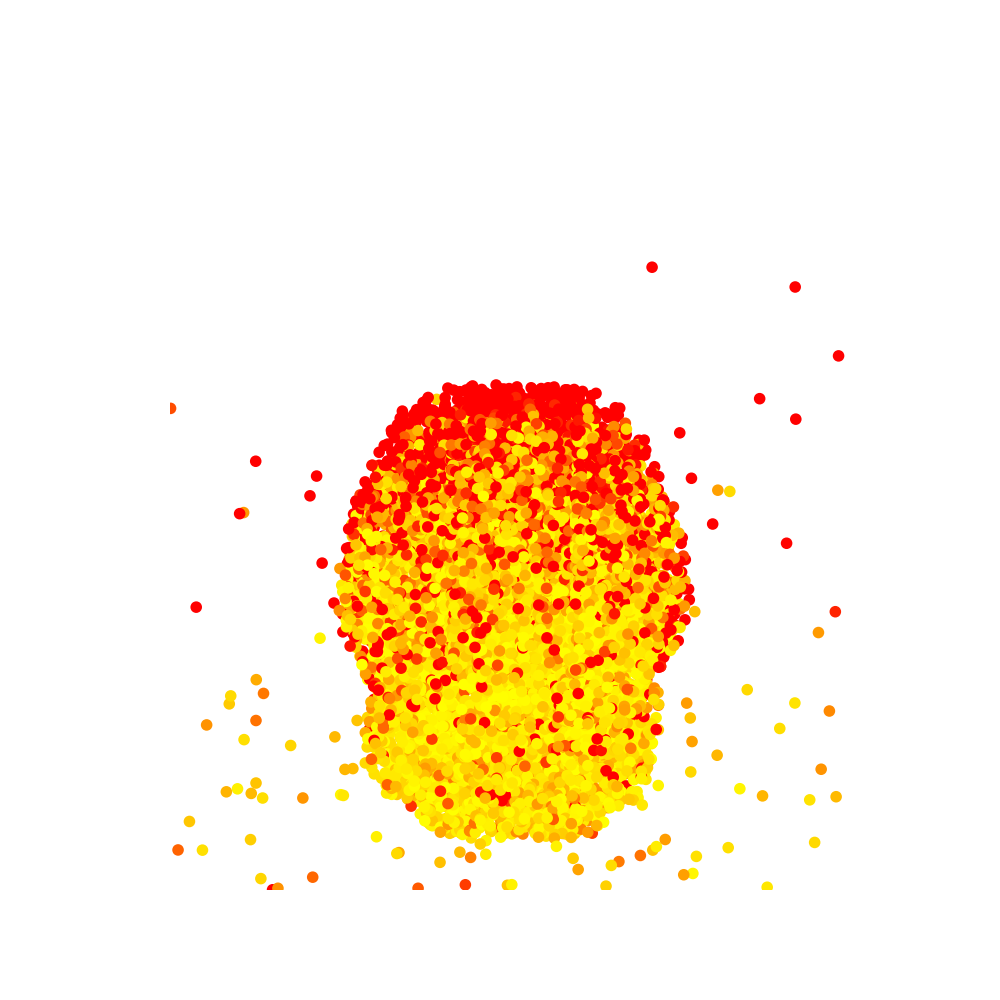

interactive(children=(FloatSlider(value=0.0, description='t', max=92000.0), Output()), _dom_classes=('widget-i…

<function __main__.update_plot(t=0)>

In [8]:
df = pd.read_csv('asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])
times = np.sort(np.array(list(set(df['time'].values))))
dt = np.diff(times)[0]
#print(times)
#print(dt)

dfUse = df.loc[df['time'].values == times[0]]

fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x1'].values, dfUse['y1'].values, s=10, 
                c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
plt.axis('off')


def update_plot(t=0):
    
    tFrac = (t % dt)/dt
    dfUse = df.loc[(df['time'].values >= t) & (df['time'].values < t+dt)]
    x = dfUse['x1'].values + (dfUse['x2'].values - dfUse['x1'].values)*tFrac
    y = dfUse['y1'].values + (dfUse['y2'].values - dfUse['y1'].values)*tFrac
    # Change the colors.
    scat.set_array(dfUse['damage'].values)
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.c_[x,y])
    #fig.canvas.draw()
    return scat,

interact(update_plot, t = widgets.FloatSlider(value=0, min=min(times),max=max(times),step=0.1))



0.12500013739700003 0.2


<IPython.core.display.Javascript object>


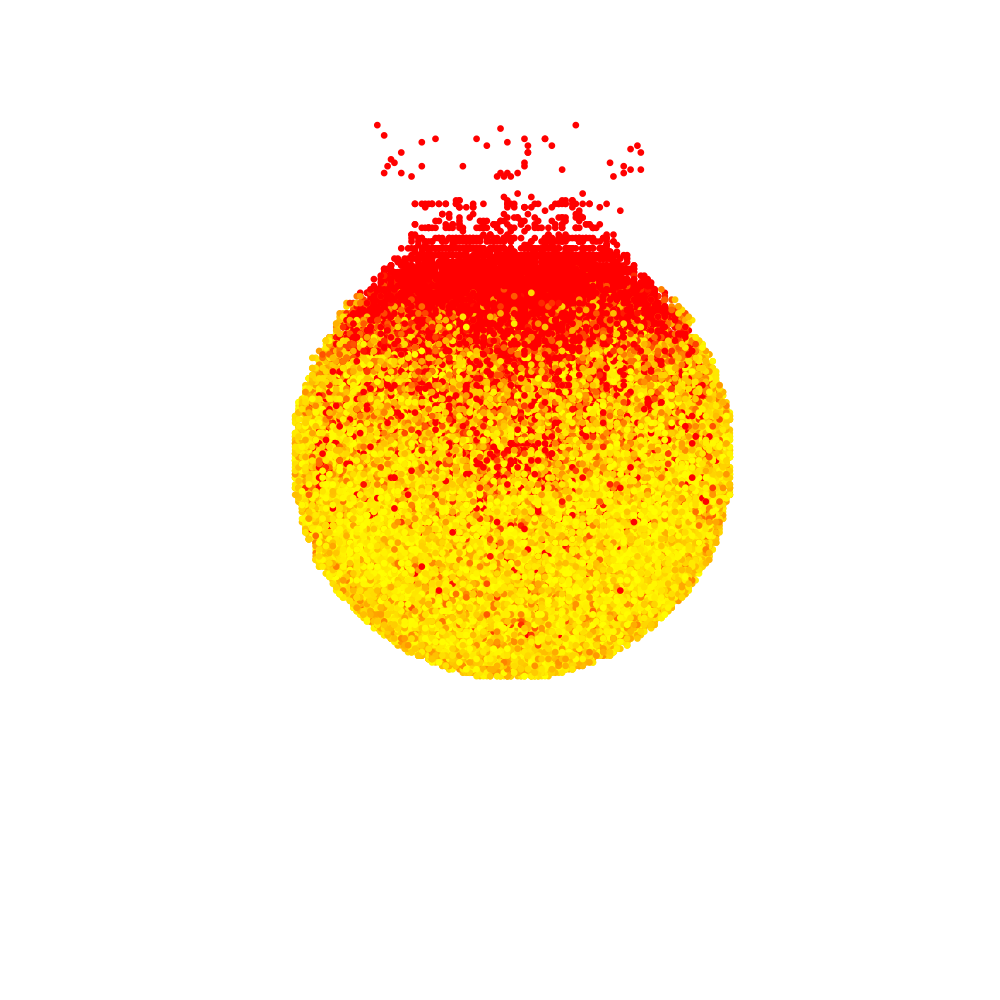

(-20000.0, 20000.0, -25000.0, 20000.0)

In [7]:
i=0
f = files[i]
#f = 'grav.000000000.csv'
#f = 'grav.000092000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
dfUse = df.sample(frac = 0.1)
print(min(dfUse['damage'].values), max(dfUse['damage'].values))
fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x'].values, dfUse['y'].values, s=2, 
                  c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
ax.axis('off')